# Import libraries

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Load audio file

In [2]:
filename0 = "./dataset/valid/bass_electronic_000-034-100.wav"
# filename1 = "./dataset/valid/brass_acoustic_000-040-100.wav"
# filename2 = "./dataset/valid/flute_acoustic_001-064-100.wav"
# filename3 = "./dataset/valid/guitar_acoustic_009-056-100.wav"
# filename4 = "./dataset/valid/keyboard_acoustic_000-041-100.wav"
# filename5 = "./dataset/valid/mallet_acoustic_000-070-100.wav"
# filename6 = "./dataset/valid/organ_electronic_000-049-100.wav"
# filename7 = "./dataset/valid/reed_acoustic_000-052-100.wav"
# filename8 = "./dataset/valid/string_acoustic_006-055-100.wav"
# filename9 = "./dataset/valid/vocal_acoustic_000-050-050.wav"

y, sr = librosa.load(filename0) 

# Play audio files

In [3]:
ipd.Audio(y, rate=sr) 

# Audio data representations

In [4]:
# Spectrogram
D = np.abs(librosa.stft(y))
D_dB = librosa.amplitude_to_db(D, ref=np.max)

In [5]:
# Mel-Spectrogram
S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)

In [6]:
# Constant-Q Transform
C = np.abs(librosa.cqt(y, sr=sr))

[Text(0.5, 1.0, 'Constant-Q')]

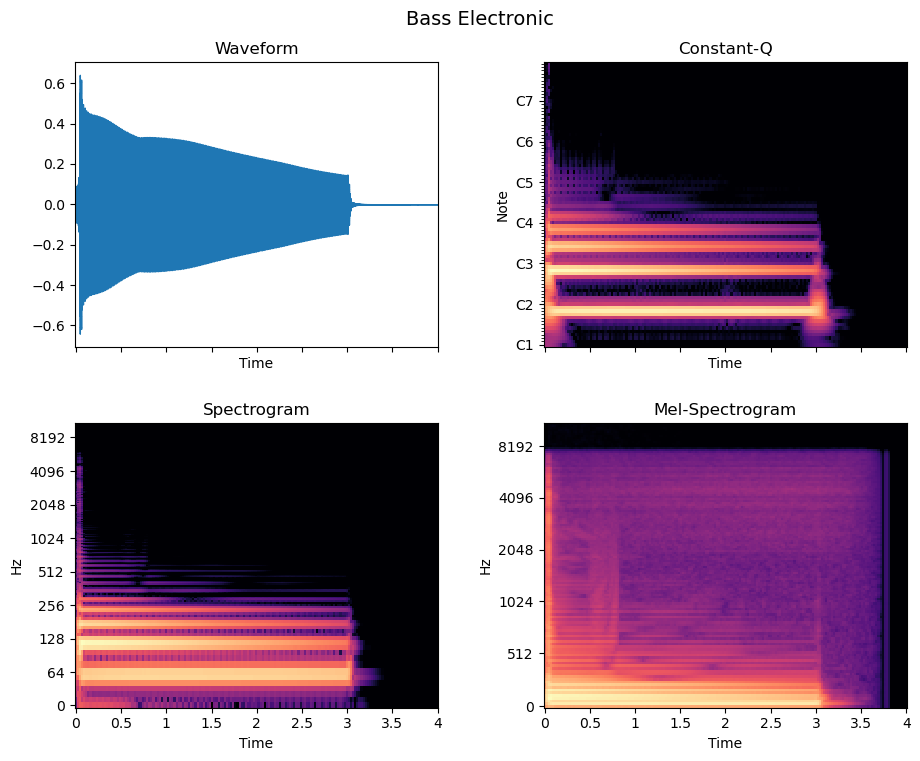

In [7]:
# Display Plots
fig, ax = plt.subplots(2,2, sharex=True, figsize=(10, 8))
fig.tight_layout(pad=4.5)
fig.suptitle('Bass Electronic', fontsize=14)

img = librosa.display.waveshow(y, sr=sr, x_axis='time', ax=ax[0,0])
ax[0,0].set(title='Waveform')

img = librosa.display.specshow(D_dB, sr=sr, x_axis='time', y_axis='log', ax=ax[1,0])
ax[1,0].set(title='Spectrogram')

img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', ax=ax[1,1])
ax[1,1].set(title='Mel-Spectrogram')

img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax[0,1])
ax[0,1].set(title='Constant-Q')